# 1장. 서울시 구별 CCTV 현황 분석

## 1. 파일 읽기

In [1]:
import pandas as pd

cctv_seoul = pd.read_excel('/Users/nani/Desktop/GitHub/DataScience/data/01. CCTV in Seoul.xlsx')
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [2]:
#pop_seoul = pd.read_excel('/Users/nani/Desktop/GitHub/DataScience/01_Seoul_CCTV/population_in_Seoul.xls')
pop_seoul = pd.read_excel('/Users/nani/Desktop/GitHub/DataScience/data/01. population in Seoul.xls',
header=2, parse_cols='B,D,G,J,N')
pop_seoul.head()

/Users/nani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  This is separate from the ipykernel package so we can avoid doing imports until


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [3]:
cctv_seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [4]:
pop_seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [5]:
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [6]:
pop_seoul.rename(columns={pop_seoul.columns[0] : '구별',
pop_seoul.columns[1] : '인구수',
pop_seoul.columns[2] : '한국인',
pop_seoul.columns[3] : '외국인',
pop_seoul.columns[4] : '고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


## 2. CCTV와 인구 현황 데이터 파악하기

In [7]:
# 구별 CCTV 현황 정리
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [8]:
cctv_seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


In [9]:
cctv_seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [10]:
cctv_seoul['최근증가율'] = (cctv_seoul['2018년'] + cctv_seoul['2017년'] +
cctv_seoul['2016년']) / (cctv_seoul['2015년'] + cctv_seoul['2014년'] + 
cctv_seoul['2013년'] + cctv_seoul['2012년'] + cctv_seoul['2011년 이전']) * 100
cctv_seoul.sort_values(by='최근증가율', ascending=False)

# 최근 3년간(2016~2018) CCTV가 그 이전 대비 많이 증가한 구는
# 중구, 영등포구, 성동구, 금천구, 광진구

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425
12,마포구,1935,585.0,108.0,69.0,70,177,359,372,195,91.774034
18,양천구,2775,772.0,161.0,185.0,169,172,349,137,830,90.198766
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078


In [11]:
# 서울시 인구 현황 정리
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [12]:
# 0행에 있는 합계 지우기
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662
5,광진구,368337,352692,15645,47347


In [13]:
# unique : 반복된 데이터는 하나로 나타내서 한 번 이상 나타난 데이터 확인
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [14]:
# NaN 데이터 있는지, 어디 있는지 확인
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [15]:
# drop 명령으로 NaN이 있던 행 삭제(예: 26행에 있다면)
# pop_seoul.drop([26], inplace=True)
# pop_seoul.head()

In [16]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162860,151767,11093,27394,6.811372,16.820582
2,중구,136663,126409,10254,23025,7.503128,16.848013
3,용산구,244989,228830,16159,38531,6.595806,15.727645
4,성동구,311290,303158,8132,43662,2.612355,14.026149
5,광진구,368337,352692,15645,47347,4.247469,12.854261


In [17]:
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,684338,677489,6849,86062,1.000821,12.575949
16,강서구,600240,593708,6532,82937,1.088231,13.817306
23,강남구,549043,544028,5015,70029,0.913408,12.754739
11,노원구,539829,535282,4547,79968,0.842304,14.813580
21,관악구,519953,502117,17836,74518,3.430310,14.331680


In [18]:
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402478,368402,34076,57350,8.466550,14.249226
17,구로구,439850,406748,33102,64952,7.525747,14.766852
18,금천구,252868,233371,19497,37191,7.710347,14.707674
21,관악구,519953,502117,17836,74518,3.430310,14.331680
6,동대문구,363779,346551,17228,58764,4.735842,16.153764


In [19]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402478,368402,34076,57350,8.466550,14.249226
18,금천구,252868,233371,19497,37191,7.710347,14.707674
17,구로구,439850,406748,33102,64952,7.525747,14.766852
2,중구,136663,126409,10254,23025,7.503128,16.848013
1,종로구,162860,151767,11093,27394,6.811372,16.820582


In [20]:
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,684338,677489,6849,86062,1.000821,12.575949
16,강서구,600240,593708,6532,82937,1.088231,13.817306
11,노원구,539829,535282,4547,79968,0.842304,14.813580
12,은평구,486159,481663,4496,79957,0.924800,16.446677
21,관악구,519953,502117,17836,74518,3.430310,14.331680


In [21]:
pop_seoul.sort_values(by='고령자비율', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,317875,314090,3785,59808,1.190720,18.814943
10,도봉구,337594,335280,2314,58070,0.685439,17.201135
2,중구,136663,126409,10254,23025,7.503128,16.848013
1,종로구,162860,151767,11093,27394,6.811372,16.820582
12,은평구,486159,481663,4496,79957,0.924800,16.446677
6,동대문구,363779,346551,17228,58764,4.735842,16.153764
7,중랑구,403776,398812,4964,64449,1.229395,15.961573
13,서대문구,324089,310069,14020,51708,4.325972,15.954877
3,용산구,244989,228830,16159,38531,6.595806,15.727645
8,성북구,454114,441590,12524,70204,2.757898,15.459554


## 3. CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [22]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549043,544028,5015,70029,0.913408,12.754739
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,430522,426219,4303,61710,0.999484,14.333762
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,317875,314090,3785,59808,1.190720,18.814943
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,600240,593708,6532,82937,1.088231,13.817306
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,519953,502117,17836,74518,3.430310,14.331680
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295,368337,352692,15645,47347,4.247469,12.854261
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,72.106667,439850,406748,33102,64952,7.525747,14.766852
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745,252868,233371,19497,37191,7.710347,14.707674
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156,42.026826,539829,535282,4547,79968,0.842304,14.813580
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,66.601942,337594,335280,2314,58070,0.685439,17.201135


In [23]:
# 의미없는 컬럼 지우기
# 행 방향으로 삭제하는 것은 drop이고, 열을 삭제하는 것은 del
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
1,강동구,1879,82.960078,430522,426219,4303,61710,0.999484,14.333762
2,강북구,1265,83.068017,317875,314090,3785,59808,1.190720,18.814943
3,강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
4,관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680


In [24]:
data_result

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
1,강동구,1879,82.960078,430522,426219,4303,61710,0.999484,14.333762
2,강북구,1265,83.068017,317875,314090,3785,59808,1.190720,18.814943
3,강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
4,관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680
5,광진구,1581,111.930295,368337,352692,15645,47347,4.247469,12.854261
6,구로구,3227,72.106667,439850,406748,33102,64952,7.525747,14.766852
7,금천구,1634,112.483745,252868,233371,19497,37191,7.710347,14.707674
8,노원구,1906,42.026826,539829,535282,4547,79968,0.842304,14.813580
9,도봉구,858,66.601942,337594,335280,2314,58070,0.685439,17.201135


In [25]:
# index 이름이 구 이름이 되도록 설정 : set_index
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
강동구,1879,82.960078,430522,426219,4303,61710,0.999484,14.333762
강북구,1265,83.068017,317875,314090,3785,59808,1.190720,18.814943
강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680


In [26]:
# 상관계수 : numpy에 있는 corrcoef
# 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 볼 수 있다.
# 상관계수의 절대값이 0.1 이하면 거의 무시, 0.3 이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계

import numpy as np
np.corrcoef(data_result['고령자비율'], data_result['소계'])

# cctv 개수와 고령자비율은 약한 음의 상관계수

array([[ 1.        , -0.43001097],
       [-0.43001097,  1.        ]])

In [27]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

# cctv 개수와 외국인비율은 큰 의미가 없다.

array([[ 1.        , -0.05979119],
       [-0.05979119,  1.        ]])

In [28]:
np.corrcoef(data_result['인구수'], data_result['소계'])

# cctv 개수와 인구수는 약한 상관관계**

array([[1.      , 0.379213],
       [0.379213, 1.      ]])

In [29]:
# cctv가 많이 설치된 구
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680
구로구,3227,72.106667,439850,406748,33102,64952,7.525747,14.766852
성북구,3003,78.008299,454114,441590,12524,70204,2.757898,15.459554
은평구,2962,43.091787,486159,481663,4496,79957,0.924800,16.446677


In [30]:
# 인구수가 많은 구
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1586,62.833676,684338,677489,6849,86062,1.000821,12.575949
강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
노원구,1906,42.026826,539829,535282,4547,79968,0.842304,14.813580
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680


## 4. CCTV 현황 그래프로 분석하기

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# matplotlib이 기본으로 가진 폰트는 한글을 지원하지 않기 때문에 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknown system..')

In [33]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739
강동구,1879,82.960078,430522,426219,4303,61710,0.999484,14.333762
강북구,1265,83.068017,317875,314090,3785,59808,1.190720,18.814943
강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680


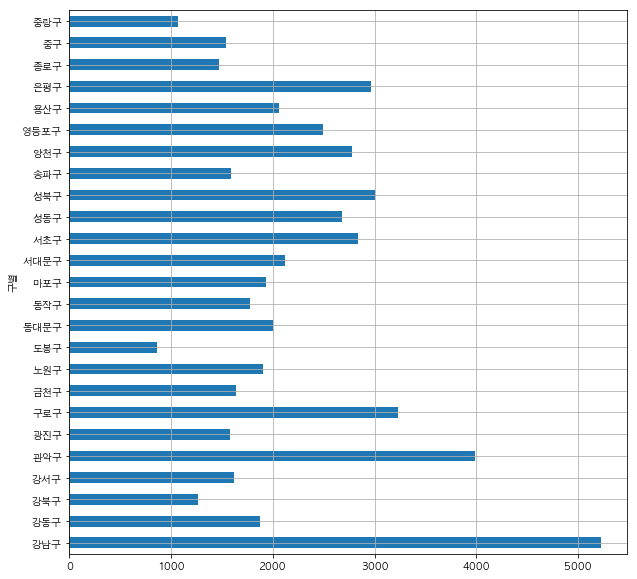

In [34]:
# cctv 개수 표현
# kind='barh' : 수평바 그리기
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

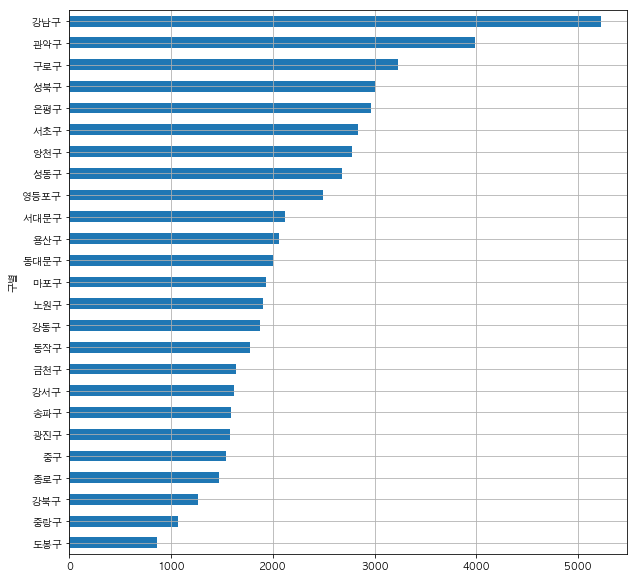

In [35]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

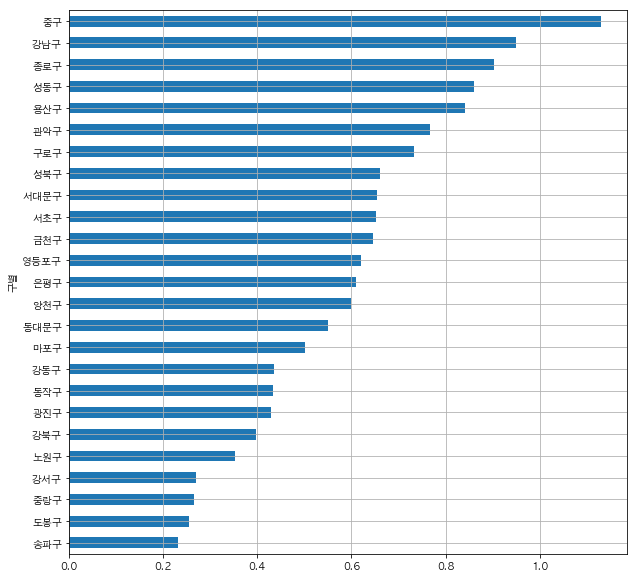

In [36]:
# 인구 대비 cctv 비율
data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

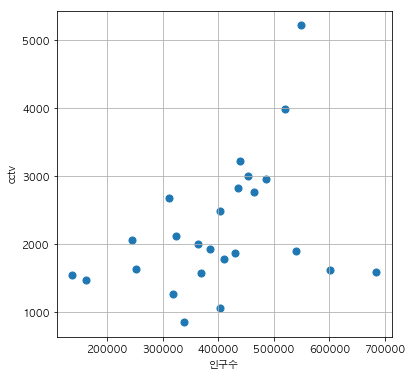

In [37]:
# scatter로 그리기
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [38]:
# polyfit : 직선 그리기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.86588167e-03, 1.07039518e+03])

In [39]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

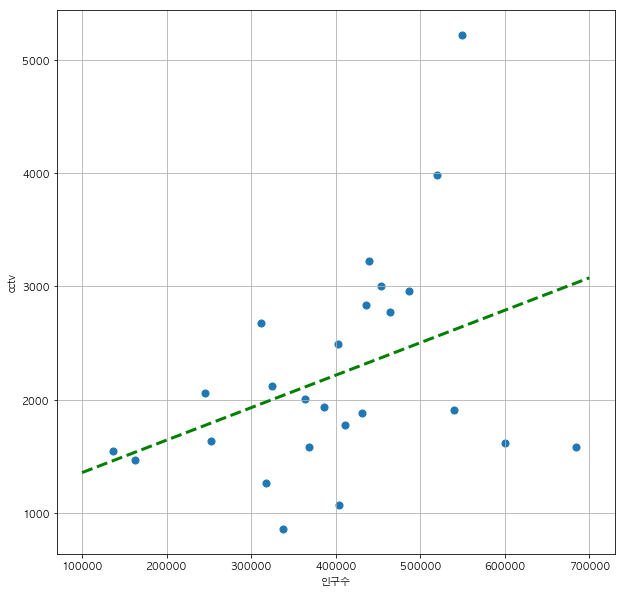

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [41]:
# 오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬해서 다시 저장하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549043,544028,5015,70029,0.913408,12.754739,0.950927,2577.112547
송파구,1586,62.833676,684338,677489,6849,86062,1.000821,12.575949,0.231757,1445.626913
관악구,3985,99.150425,519953,502117,17836,74518,3.430310,14.331680,0.766415,1424.481045
도봉구,858,66.601942,337594,335280,2314,58070,0.685439,17.201135,0.254151,1179.899640
강서구,1617,77.887789,600240,593708,6532,82937,1.088231,13.817306,0.269392,1173.611997


In [43]:
# 다른 이름으로 저장
df_sort.to_csv('/Users/nani/Desktop/GitHub/DataScience/data/01. CCTV Result.csv', sep=',')

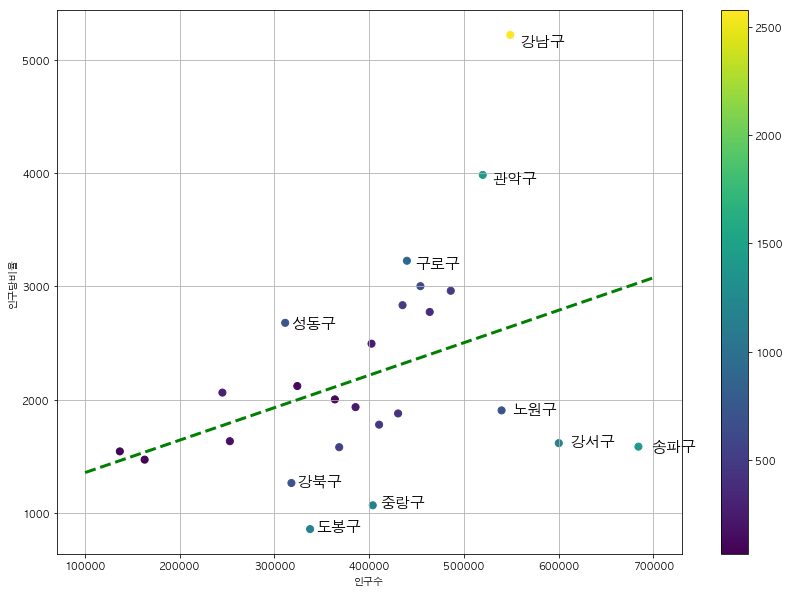

In [42]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

### 결과
1. 직선을 기준으로 위에 있는 '강남구', '관악구', '구로구', '성동구'는 서울시 전체 지역의 일반적인 경향보다 cctv가 많이 설치된 지역이다.
2. 직선을 기준으로 아래에 있는 '송파구', '강서구', '노원구', 중랑구', '도봉구', '강북구'는 일반적인 경향보다 cctv가 적게 설치된 지역이다.
3. 특히 '강남구'는 월등히 많은 cctv가 설치됐지만, '송파구'는 인구수에 비해 너무나도 적은 수의 cctv를 가지고 있다.
